In [185]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [187]:
data = pd.read_csv('updated_data.csv')

In [189]:
data.isnull().sum()


CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [191]:
print(data.dtypes)

CLIENTNUM                                                                                                                               int64
Attrition_Flag                                                                                                                         object
Customer_Age                                                                                                                            int64
Gender                                                                                                                                 object
Dependent_count                                                                                                                         int64
Education_Level                                                                                                                        object
Marital_Status                                                                                                                         object
Income

In [193]:
data.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


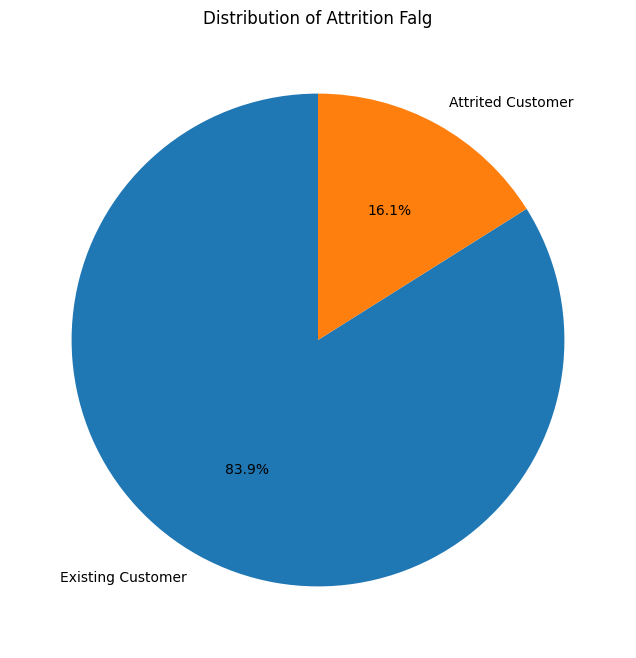

In [195]:
target_col = 'Attrition_Flag'
target_counts = data[target_col].value_counts()
plt.figure(figsize=(8, 8)) 
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=90)
plt.title(f"Distribution of Attrition Falg")
plt.show()

In [197]:
# Drop the CLIENTNUM column as it's not useful for prediction
data.drop('CLIENTNUM', axis=1, inplace=True)
data.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',axis=1,inplace=True)
data.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',axis=1,inplace=True)

# Display the remaining columns
print(data.columns)

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')


In [199]:
# List of categorical columns
categorical_columns = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

# Encoding the categorical columns
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Convert the target variable
data['Attrition_Flag'] = data['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})

# Display the first few rows to verify encoding
print(data.head())

   Attrition_Flag  Customer_Age  Gender  Dependent_count  Education_Level  \
0               0            45       1                3                3   
1               0            49       0                5                2   
2               0            51       1                3                2   
3               0            40       0                4                3   
4               0            40       1                3                5   

   Marital_Status  Income_Category  Card_Category  Months_on_book  \
0               1                2              0              39   
1               2                4              0              44   
2               1                3              0              36   
3               1                4              0              34   
4               1                2              0              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                 

In [211]:
# Drop the 'Attrition_Flag' column from the dataset to create the features (X)
X = data.drop(columns=['Attrition_Flag'])  

# Define 'Attrition_Flag' as the target variable (y)
y = data['Attrition_Flag']  

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [213]:
# Initialize the StandardScaler to scale the features for KNN
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [215]:
# Define a parameter grid to search for the best number of neighbors (n_neighbors) for the KNN classifier
param_grid = {'n_neighbors': range(3, 15)}

# Perform GridSearchCV to find the best number of neighbors for KNN
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, scoring='f1_weighted')

# Fit the grid search to the training data to find the optimal K
grid_search.fit(X_train, y_train)

# Print the best number of neighbors found during the grid search
print(f"Best K: {grid_search.best_params_['n_neighbors']}")

Best K: 7


In [217]:
# Get the best K from grid search
best_k = grid_search.best_params_['n_neighbors']

# Initialize the KNN classifier with the best K
knn = KNeighborsClassifier(n_neighbors=best_k)

# Fit the model
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=7)

In [219]:
# Predict the labels for the test set
y_pred = knn.predict(X_test_scaled)

# Print the predicted labels for the test data
print("Predicted Labels: ",y_pred)

# Calculate and print the accuracy of the model
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print a detailed classification report that includes precision, recall, and F1 score
print("Classification Report:\n", classification_report(y_test, y_pred))

# Print the confusion matrix to see the distribution of true positives, false positives, etc.
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Predicted Labels:  [0 0 0 ... 0 0 0]
Accuracy: 0.9009542612701547
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      2543
           1       0.85      0.48      0.61       496

    accuracy                           0.90      3039
   macro avg       0.88      0.73      0.78      3039
weighted avg       0.90      0.90      0.89      3039

Confusion Matrix:
 [[2502   41]
 [ 260  236]]
